### Making final news dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

In [3]:
Google_news_crypto_drop=pd.read_csv('Google_news_crypto_drop.csv')
Google_news_classic_drop=pd.read_csv('Google_news_classic_drop.csv')

In [4]:
Google_news_classic_drop.head()

,Unnamed: 0,Head,Date,source,marker,Sentiment_VADER_comp_classic,textblob_classic
0,2,coinye what a kanye west–themed cryptocurrency...,2014-01-02,The Daily Dot,0,0.0000,0.0
1,3,rep steve stockman accepting bitcoin donations...,2014-01-02,CBS News,0,0.3818,0.0
2,4,kanye westthemed bitcoin clone said to launch ...,2014-01-02,The Verge,0,0.0000,0.0
3,5,kanye west bitcoin rival coinye west launched,2014-01-02,Metro.co.uk,0,0.1280,0.0
4,6,kanye west getting bitcoinesque cryptocurrency...,2014-01-02,Hollywood Reporter,0,0.0000,0.0


### Готовим контрольные переменные

In [5]:
#для начала определим финальный датасет
Dataset_crypto_sentiment=pd.DataFrame(Google_news_crypto_drop[['Sentiment_VADER_comp_crypto','textblob_crypto']].groupby(Google_news_crypto_drop['Date']).mean())
Dataset_classic_sentiment=pd.DataFrame(Google_news_classic_drop[['Sentiment_VADER_comp_classic','textblob_classic']].groupby(Google_news_classic_drop['Date']).mean())

In [6]:
#VIX Index
VIX_index=pd.read_csv('VIXCLS.csv')

In [7]:
#EPU index by Baker (2016)
EPU = pd.read_csv('USEPUINDXD-2.csv')

In [8]:
#Gold prices
Gold_price = pd.read_csv('Gold Futures Historical Data-2.csv')
Gold_price.drop(columns=['Open','High','Low','Vol.','Change %'], inplace=True)
#конвертируем столбец в даты
Gold_price['Date'] = pd.to_datetime(Gold_price['Date']).dt.date

#конвертируем в строки с удобным форматом
#Gold_price['Date'] = Gold_price['Date'].dt.strftime('%d/%m/%Y')

#снова в даты но уже удобные
#Gold_price['Date'] = pd.to_datetime(Gold_price['Date'])

Gold_price=Gold_price.sort_values(by=['Date'],ignore_index=True)

In [9]:
Bitcoin=pd.read_csv('Bitcoin Historical Data-2.csv')
Bitcoin.drop(columns=['Open','High','Low','Vol.','Change %'], inplace=True)
#конвертируем столбец в даты
Bitcoin['Date'] = pd.to_datetime(Bitcoin['Date']).dt.date

#конвертируем в строки с удобным форматом
#Bitcoin['Date'] = Bitcoin['Date'].dt.strftime('%d/%m/%Y')

Bitcoin=Bitcoin.sort_values(by=['Date'],ignore_index=True)

### Работаем с независимыми переменными

In [10]:
#VIX_index содержит точки в некоторых строках - надо удалить их
VIX_index=VIX_index.drop(VIX_index[VIX_index['VIXCLS']=='.'].index)
VIX_index.rename(columns={'DATE':'Date','VIXCLS':'VIX'},inplace=True)
VIX_index['Date'] = pd.to_datetime(VIX_index['Date'])
VIX_index['VIX']=VIX_index['VIX'].astype('float')

In [11]:
#Bitcoin
Bitcoin['Date']=pd.to_datetime(Bitcoin['Date'])
Bitcoin['Price']=Bitcoin['Price'].apply(lambda x: x.replace(',',''))
Bitcoin['Price']=Bitcoin['Price'].astype('float')
Bitcoin.rename(columns={'Price':'Bitcoin_price'},inplace=True)

In [12]:
#Gold
Gold_price['Date']=pd.to_datetime(Gold_price['Date'])
Gold_price['Price']=Gold_price['Price'].apply(lambda x: x.replace(',',''))
Gold_price['Price']=Gold_price['Price'].astype('float')
Gold_price.rename(columns={'Price':'Gold_price'},inplace=True)

In [13]:
#EPU
EPU.rename(columns={'DATE':'Date','USEPUINDXD':'EPU'},inplace=True)
EPU['Date']=pd.to_datetime(EPU['Date'])
EPU['EPU']=EPU['EPU'].astype('float')

In [14]:
#Merging datasets
Dataset=Dataset_crypto_sentiment.merge(Dataset_classic_sentiment,on='Date',how='left')
Dataset.index.names = ['Dates']
Dataset['Date']=Dataset.index
Dataset['Date']=pd.to_datetime(Dataset['Date'])
Dataset=Dataset.merge(VIX_index,on='Date',how='left')
Dataset=Dataset.merge(Bitcoin,on='Date',how='left')
Dataset=Dataset.merge(Gold_price,on='Date',how='left')
Dataset=Dataset.merge(EPU,on='Date',how='left')

In [15]:
Dataset

,Sentiment_VADER_comp_crypto,textblob_crypto,Sentiment_VADER_comp_classic,textblob_classic,Date,VIX,Bitcoin_price,Gold_price,EPU
0,0.331350,0.000000,0.058157,0.000000,2014-01-02,14.23,856.9,1225.2,103.08
1,0.173500,0.033333,0.070460,0.000000,2014-01-03,13.76,884.3,1238.6,113.11
2,0.610800,-0.500000,0.000000,-0.041667,2014-01-04,NaN,924.7,NaN,77.86
3,0.000000,0.000000,-0.148000,0.000000,2014-01-05,NaN,1014.7,NaN,144.91
4,0.163600,0.000000,0.228850,0.009375,2014-01-06,13.55,1012.7,1238.0,121.14
...,...,...,...,...,...,...,...,...,...
3312,0.034707,0.040000,0.024409,0.019606,2024-03-15,14.41,69463.7,2171.6,181.53
3313,0.306200,0.200000,0.013663,0.062500,2024-03-17,NaN,68391.2,NaN,180.66
3314,0.082062,0.058718,0.077035,0.070000,2024-03-18,14.33,67594.1,2174.5,140.24
3315,-0.077284,0.027512,-0.013600,0.083324,2024-03-19,13.82,62050.0,2169.8,91.96


In [16]:
#The most optimal size in terms of missing values
Dataset=Dataset[Dataset['Date']<='2024-03-01']

In [17]:
#Interpolate nans
Dataset['VIX']=Dataset['VIX'].interpolate(method='linear', limit_direction='both')
Dataset['Bitcoin_price']=Dataset['Bitcoin_price'].interpolate(method='linear', limit_direction='both')
Dataset['Gold_price']=Dataset['Gold_price'].interpolate(method='linear', limit_direction='both')
Dataset['EPU']=Dataset['EPU'].interpolate(method='linear', limit_direction='both')

In [ ]:
#for graph

In [25]:
Bitcoin_graph=Bitcoin[Bitcoin['Date']>'2017-01-01']

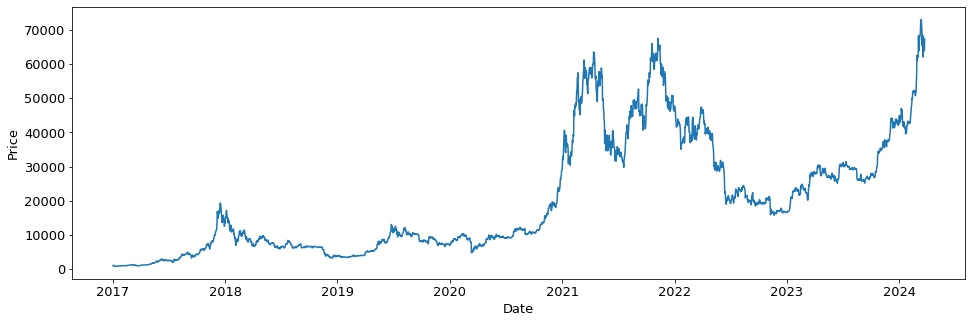

In [46]:
plt.figure(figsize=(16,5))

plt.rcParams['font.size'] = 13

plt.xlabel('Date')
plt.ylabel('Price')
Bitcoin_graph=Bitcoin_graph.sort_values(by=['Date'],ignore_index=True)
plt.plot(Bitcoin_graph['Date'],Bitcoin_graph['Bitcoin_price'])

plt.savefig('ценабиткойна.png', bbox_inches='tight')

In [ ]:
#for returns graph

In [71]:
import math
returns = np.log(Bitcoin_graph['Bitcoin_price']/Bitcoin_graph['Bitcoin_price'].shift(1))


In [72]:
Bitcoin_graph_returns=Bitcoin_graph[1:]
Bitcoin_graph_returns['Bitcoin_returns']=returns

In [74]:
Bitcoin_graph_returns['Bitcoin_returns'].min()

-0.49727798909057785

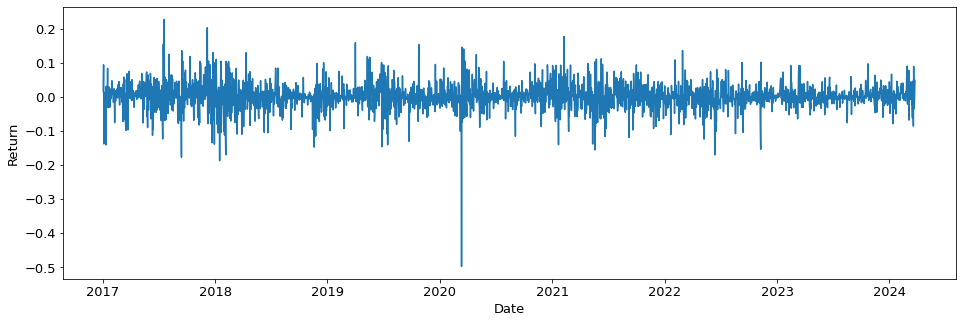

In [75]:
plt.figure(figsize=(16,5))
plt.xlabel('Date')
plt.ylabel('Return')
Bitcoin_graph_returns=Bitcoin_graph_returns.sort_values(by=['Date'],ignore_index=True)
plt.plot(Bitcoin_graph_returns['Date'],Bitcoin_graph_returns['Bitcoin_returns'])

plt.savefig('доходность.png', bbox_inches='tight')


In [38]:
#for graph

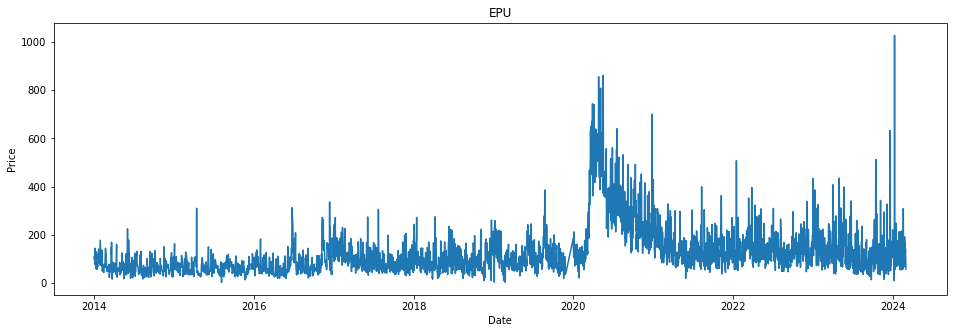

In [19]:
plt.figure(figsize=(16,5))
plt.title('EPU')
plt.xlabel('Date')
plt.ylabel('Price')
Bitcoin=Bitcoin.sort_values(by=['Date'],ignore_index=True)
plt.plot(Dataset['Date'],Dataset['EPU'])

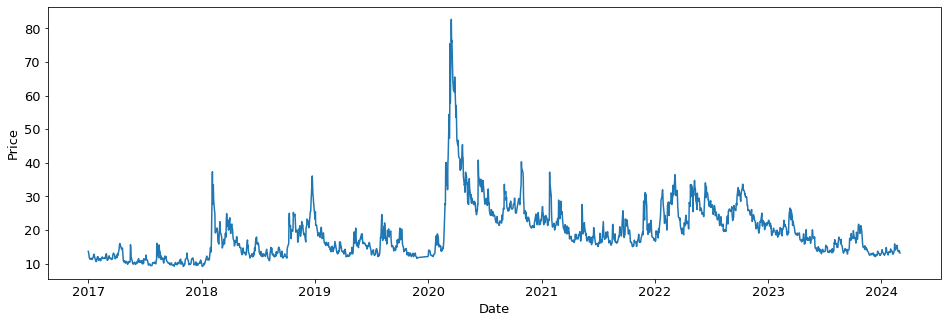

In [49]:
plt.figure(figsize=(16,5))

plt.xlabel('Date')
plt.ylabel('Price')
Bitcoin=Bitcoin.sort_values(by=['Date'],ignore_index=True)
plt.plot(Dataset[Dataset['Date']>='2017-01-01']['Date'],Dataset[Dataset['Date']>='2017-01-01']['VIX'])

plt.savefig('vixindex.png', bbox_inches='tight')

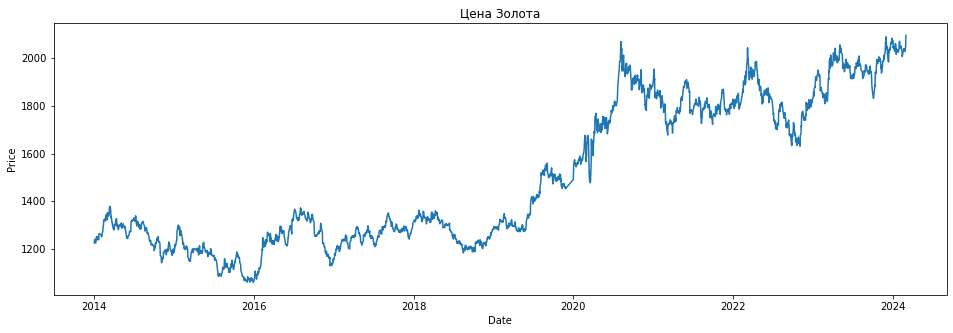

In [21]:
plt.figure(figsize=(16,5))
plt.title('Цена Золота')
plt.xlabel('Date')
plt.ylabel('Price')
Bitcoin=Bitcoin.sort_values(by=['Date'],ignore_index=True)
plt.plot(Dataset['Date'],Dataset['Gold_price'])

In [43]:
Dataset.to_csv('Dataset_final_2.csv')